# Discussion 01

Welcome to Discussion 01. In this discussion, we'll get more practice with linear predictors and basis functions.

Some of the problems below can either be calculated "by hand" or with code. You can use either approach unless stated otherwise.

In [1]:
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt

# Part 1. Linear Predictors

**Problem 01**. Suppose $H$ is a linear prediction function of the form discussed in lecture with weights $w_0 = 5, w_1 = -2, w_2 = 4, w_3 = -5$. Let $\vec x = (1,2,3)^T$. What is $H(\vec x)$?

In [2]:
# BEGIN SOLUTION
p01_answer = 5 + -2 * 1 + 4 * 2 + -5 * 3
p01_answer
# END SOLUTION

-4

**Problem 02.** Below is a data set of ten unaugmented feature vectors:

In [3]:
np.random.seed(42)
X = np.random.normal(0, 1, (10, 3))
X

array([[ 0.49671415, -0.1382643 ,  0.64768854],
       [ 1.52302986, -0.23415337, -0.23413696],
       [ 1.57921282,  0.76743473, -0.46947439],
       [ 0.54256004, -0.46341769, -0.46572975],
       [ 0.24196227, -1.91328024, -1.72491783],
       [-0.56228753, -1.01283112,  0.31424733],
       [-0.90802408, -1.4123037 ,  1.46564877],
       [-0.2257763 ,  0.0675282 , -1.42474819],
       [-0.54438272,  0.11092259, -1.15099358],
       [ 0.37569802, -0.60063869, -0.29169375]])

Suppose we have training a linear prediction function and obtained the following weight vector:

In [4]:
w = np.array([1, -2, 3, -4])

Here, `w[0]` is the bias term, `w[1]` is the weight of the first feature (the first column of `X`), etc. Compute the array of predictions -- it should contain ten elements, one for each row of `X`.

In [5]:
# BEGIN SOLUTION
X_augmented = np.column_stack((np.ones(len(X)), X))
p02_answer = X_augmented @ w 
p02_answer
# END SOLUTION

array([-2.99897536, -1.81197201,  2.0217761 ,  0.38754585,  1.67590605,
       -2.17090763, -7.28345803,  7.35312996,  7.02550753, -0.38653711])

**Problem 03**. Suppose you have trained a linear prediction function to predict the price of a house given three features:

1. Size in square feet
2. Number of bathrooms
3. Number of holes in the roof

Assuming that your prediction function makes good predictions, what do you expect the *sign* of the weights $w_1, w_2,$ and $w_3$ to be? To denote a positive weight, set a variable to 1; to denote a negative weight, set the variable to -1.

In [6]:
# BEGIN SOLUTION
w_1_sign = 1
w_2_sign = 1
w_3_sign = -1
# END SOLUTION

**Problem 04**. Suppose you build a regression model to predict the number of hours of TV that
a person watches in a day given their age, income, etc. In your training set,
the actual number of hours each person watched is 8, 3, 1, 10, and 5. Your
model predicts 9, 2, 0, 9, and 3. What is the mean squared error of your
predictions?

Fun fact: in a typical, non-quarantine day, the average American watches
between 4 to 5 hours of TV.

In [7]:
# BEGIN SOLUTION
p04_answer = (1 + 1 + 1 + 1 + 2**2) / 5
p04_answer
# END SOLUTION

1.6

**Problem 05**. The array `X_apt` is a data matrix containing the number of bedrooms and number of bathrooms for five San Diego apartments. The array `y_apt` contains the price of rent for each apartment.

In [8]:
X_apt = np.array([
    [2, 3],
    [4, 4],
    [5, 3],
    [3, 2],
    [3, 1]
])

y_apt = np.array([2000, 3000, 4000, 1750, 1650])

Using numpy only, train a linear prediction function of the form $H(\vec x) = w_0 + w_1 x_1 + w_2 x_2$ to predict the apartment price from the number of bedrooms and bathrooms (where $x_1$ is number of bedrooms and $x_2$ is number of bathrooms. Store the learned weights in the array `w_apt`.

You can use whatever numpy functions you'd like.

In [9]:
# BEGIN SOLUTION
X_augmented = np.column_stack((
    np.ones(len(X_apt)),
    X_apt
))
w_apt = np.linalg.lstsq(X_augmented, y_apt)[0] # SOLUTION
w_apt
# END SOLUTION

/var/folders/4h/d0jgk4h54fs3gtml10tb7q840000gn/T/nix-shell.Cf7qB4/ipykernel_40080/4118146876.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w_apt = np.linalg.lstsq(X_augmented, y_apt)[0] # SOLUTION


array([-631.51260504,  662.60504202,  330.25210084])

**Problem 06.** Complete the function below so that it takes in an array of predictions and a target array of correct answers (1 or -1) and returns the expected perceptron loss. Note that the prediction is the output of the prediction function, and is a real number (is is not necessarily 1 or -1, but can be, for example, 0.3).

In [10]:
def expected_perceptron_loss(predictions, targets):
    """Compute the expected perceptron loss.
    
    Parameters
    ----------
    predictions : np.ndarray
        An array of predictions as output by a prediction function.
    targets : np.ndarray
        An array of "right answers".
        
    Returns
    -------
    float
        The expected perceptron loss.
        
    Example
    -------
    >>> expected_perceptron_loss(
        predictions=np.array([.1, .4, -.3, .6]), 
        targets=np.array([1, -1, 1, 1])
        )
    0.175
    
    """
    # BEGIN SOLUTION
    return np.abs(predictions[np.sign(predictions) != targets]).sum() / len(predictions)
    # END SOLUTION

In [11]:
## EXAMPLE 1 ##
expected_perceptron_loss(
        predictions=np.array([.1, .4, -.3, .6]), 
        targets=np.array([1, -1, 1, 1])
        )

0.175

In [12]:
## EXAMPLE 2 ##
expected_perceptron_loss(
        predictions=np.array([.1, .4, -.3, .6, -2, -.3, 5, 3.1]), 
        targets=np.array([1, -1, 1, 1, -1, -1, 1, 1])
        )

0.0875

**Problem 07**. The figure below shows a data set consisting of 200 points from two classes.

<img width=50% src="fig/data.png">

Suppose this data set is transformed to a new representation using basis functions $\phi_1$ and $\phi_2$. The result is show below:

<img width=50% src="fig/data_transformed.png">

Which of the following options gives the basis functions that were used?

- a) $\phi_1(x_1, x_2) = |x_1|, \quad \phi_2(x_1, x_2) = |x_2|$
- b) $\phi_1(x_1, x_2) = |x_1 - x_2|, \quad \phi_2(x_1, x_2) = |x_1 + x_2|$
- c) $\phi_1(x_1, x_2) = x_1 \cdot x_2, \quad \phi_2(x_1, x_2) = x_1 + x_2$
- d) $\phi_1(x_1, x_2) = x_1^2 + x_2^2, \quad \phi_2(x_1, x_2) = -x_1$

In [13]:
'c' # SOLUTION

'c'

**Problem 08**. The *training accuracy* of a classifier is the proportion of predictions it gets correct on the training set. Complete the code below (using numpy only) so that it returns the training accuracy when given as input an array containing the predictions made by a prediction function on the training set and an array of the correct labels (1 or -1). Note that the output of the predictor may be an arbitrary real number, like 0.3, in which case the $\operatorname{sign}()$ function should be used to "convert" it to $\{-1, 1\}$.

If a prediction is identically zero, you may assign it to whichever class you'd like.

In [14]:
def accuracy(predictions, correct_labels):
    """Computes the accuracy of predictions made by a classifier.
    
    Example
    -------
    >>> accuracy([-.3, .2, .4, -.5], [-1, 1, 1, 1])
    0.75
    """
    # BEGIN SOLUTION
    return (np.sign(predictions) == correct_labels).mean()
    # END SOLUTION

In [15]:
## EXAMPLE 1 ##
accuracy([-.3, .2, .4, -.5], [-1, 1, 1, 1])

0.75

In [16]:
## EXAMPLE 2 ##
accuracy([-.3, .2, .4, -.5, -1, -5, .1, .3, .4, .6], [-1, 1, 1, 1, -1, 1, -1, 1, 1, -1])

0.6

# Part 2. Basis Functions

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In this section, we will get more practice with basis functions. Specifically, we'll see how they can be used for regression.

Let's start by remembering how to perform linear regression by minimizing expected square loss. Here is a data set with a linear trend:

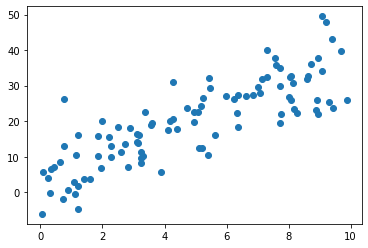

In [18]:
x = np.random.uniform(0, 10, 100)
y = 3 * x + 5 + np.random.normal(0, 7, 100)
plt.scatter(x, y)

**Problem 01**. Fit a line of the form $h(x) = w_0 + w_1(x)$ to the data above by minimizing the expected square loss (mean squared error). Plot your line to check that it is correct.

/var/folders/4h/d0jgk4h54fs3gtml10tb7q840000gn/T/nix-shell.Cf7qB4/ipykernel_40080/4162962128.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w = np.linalg.lstsq(X, y)[0]


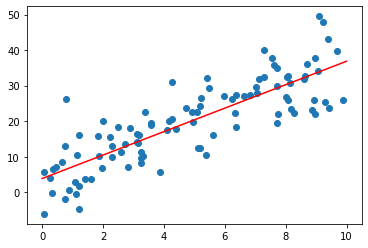

In [19]:
# BEGIN SOLUTION
X = np.column_stack((
    np.ones_like(x),
    x
))
w = np.linalg.lstsq(X, y)[0]

prediction = lambda x: w[0] + w[1] * x

plt.scatter(x, y)
plt.plot([0, 10], [prediction(0), prediction(10)], color='red')
# END SOLUTION

**Problem 02**. This works if the trend is linear, but what if the trend is not linear in $x$? One of the things we can do is use different basis functions. Here is a new data set that is very non-linear:

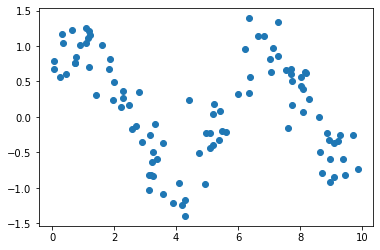

In [20]:
y = np.sin(np.pi/3 * x + .5) + np.random.normal(0, .3, 100)
plt.scatter(x, y)

Fit a function of the form $h(x) = w_0 + w_1 x + w_2 x^2 + w_3 x^3 + w_4 x^4 + w_5 x^5$ to this data by minimizing the expected square loss. Plot your prediction function to check that it is reasonable.

/var/folders/4h/d0jgk4h54fs3gtml10tb7q840000gn/T/nix-shell.Cf7qB4/ipykernel_40080/1443385246.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w = np.linalg.lstsq(X, y)[0]


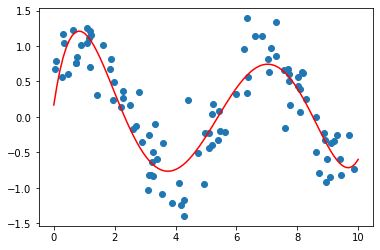

In [21]:
# BEGIN SOLUTION
X = np.column_stack((
    np.ones_like(x),
    x,
    x**2,
    x**3,
    x**4,
    x**5
))
w = np.linalg.lstsq(X, y)[0]

prediction = lambda x: w[0] + w[1] * x + w[2] * x**2 + w[3] * x**3 + w[4] * x**4 + w[5] * x**5

plt.scatter(x, y)
xx = np.linspace(0, 10, 100)
plt.plot(xx, prediction(xx), color='red')
# END SOLUTION

**Problem 03**. Consider the data set below:

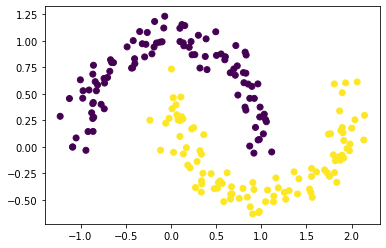

In [22]:
np.random.seed(42)
X_moons, y_moons = sklearn.datasets.make_moons(200, noise=.1)
y_moons = (y_moons - .5) * 2

plt.scatter(*X_moons.T, c=y_moons)

Here, `X_moons` represents a training set of points in $\mathbb R^2$, containing one data point per row. `y_moons` contains the label of each training point.

Design four basis functions, $\varphi_1, \ldots, \varphi_4$ for transforming this data into a new representation in $\mathbb R^4$ where binary classification becomes "easy". Your functions should take in the entire data matrix, `X`, and return an array containing the new feature for each training point.

Your basis functions will be evaluated by training a least squares classifier on the augmented new features. To receive full credit, your new representation should be good enough that the classifier has a training accuracy of at least 90%.

In [23]:
# BEGIN SOLUTION
def phi_1(X):
    return np.exp(-np.sum((X - [0, -.5])**2, axis=1))

def phi_2(X):
    return np.exp(-np.sum((X - [2, -.5])**2, axis=1))

def phi_3(X):
    return np.exp(-np.sum((X - [-.5, 1.25])**2, axis=1))

def phi_4(X):
    return np.exp(-np.sum((X - [1, 1.25])**2, axis=1))

Phi = np.column_stack((
    np.ones(len(X_moons)),
    phi_1(X_moons),
    phi_2(X_moons),
    phi_3(X_moons),
    phi_4(X_moons)
))
w = np.linalg.solve(Phi.T @ Phi, Phi.T @ y_moons)
(np.sign(Phi @ w) == y_moons).mean()
# END SOLUTION

0.93

In [24]:
# FINISHED #